# Ushbu amaliyotda biz, mijozlar noroziligi(customer churn)ni aniqlaymiz

Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

In [ ]:
# Kerakli kutubxonalarni import qilamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn import metrics

from xgboost import XGBClassifier

### Dataset bilan tanishuv

In [45]:
url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [46]:
df.shape

(5630, 20)

In [47]:
# Har bir ustun ma'lumotlari
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[2,3])
description

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [48]:
description['Discerption'].values

array(['Unique customer ID', 'Churn Flag',
       'Tenure of customer in organization',
       'Preferred login device of customer', 'City tier',
       'Distance in between warehouse to home of customer',
       'Preferred payment method of customer', 'Gender of customer',
       'Number of hours spend on mobile application or website',
       'Total number of deceives is registered on particular customer',
       'Preferred order category of customer in last month',
       'Satisfactory score of customer on service',
       'Marital status of customer',
       'Total number of added added on particular customer',
       'Any complaint has been raised in last month',
       'Percentage increases in order from last year',
       'Total number of coupon has been used in last month',
       'Total number of orders has been places in last month',
       'Day Since last order by customer',
       'Average cashback in last month'], dtype=object)

## Ma'lumotlarni tahlil qilamiz

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [50]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [51]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [52]:
print("Qolgan(0) va ketib qolgan(1) mijozlar soni:\n", df['Churn'].value_counts())
print("\nQolgan(0) va ketib qolgan(1) mijozlar soni(%):\n", df['Churn'].value_counts()/len(df)*100)

Qolgan(0) va ketib qolgan(1) mijozlar soni:
 Churn
0    4682
1     948
Name: count, dtype: int64

Qolgan(0) va ketib qolgan(1) mijozlar soni(%):
 Churn
0    83.161634
1    16.838366
Name: count, dtype: float64


Ushbu ustun nisbatini vizual tarzda chiqaramiz

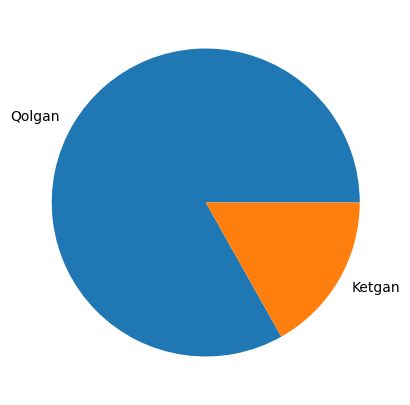

In [53]:
churn_rate = df['Churn'].value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'])
plt.show()

### Ba'zi sonli ustunlarni tahlil qilib ko'ramiz

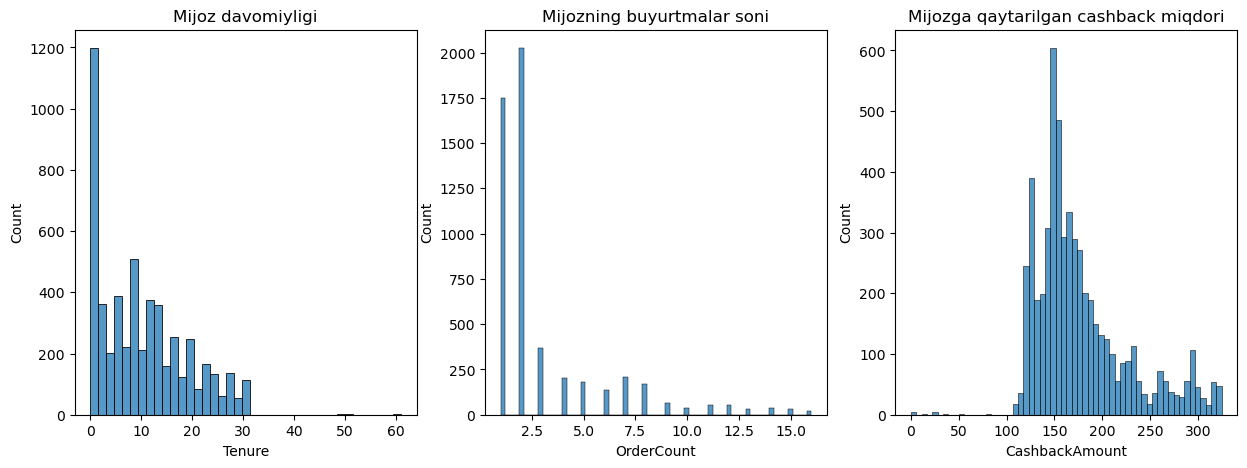

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Tenure
sns.histplot(data=df, x='Tenure', ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

# OrderCount
sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title("Mijozning buyurtmalar soni")

# CashbackAmount
sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

### Kategoriyali ustunlarni tahlil qilamiz

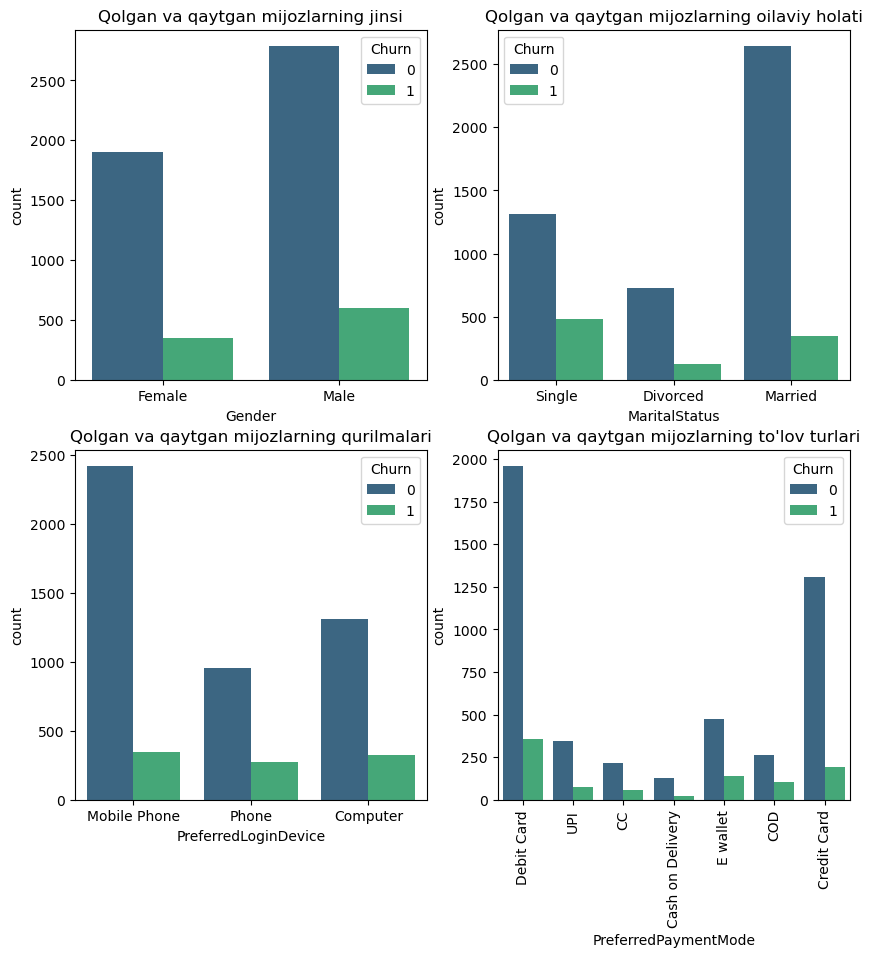

In [55]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
plt.xticks(rotation=(90))

# Gender
sns.countplot(data=df, x='Gender', hue='Churn', palette='viridis', ax=axes[0,0])
axes[0,0].set_title("Qolgan va qaytgan mijozlarning jinsi")

# Marital Status
sns.countplot(data=df, x='MaritalStatus', hue="Churn", palette='viridis', ax=axes[0,1])
axes[0,1].set_title("Qolgan va qaytgan mijozlarning oilaviy holati")

# Preferred Login Device
sns.countplot(data=df, x='PreferredLoginDevice', hue="Churn", palette='viridis', ax=axes[1,0])
axes[1,0].set_title("Qolgan va qaytgan mijozlarning qurilmalari")

# Preferred Payment Mode
sns.countplot(data=df, x='PreferredPaymentMode', hue="Churn", palette='viridis', ax=axes[1,1])
axes[1,1].set_title("Qolgan va qaytgan mijozlarning to'lov turlari")

plt.show()

In [56]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

## Ma'lumotlarga ishlov berish

In [57]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")

#df dagi mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")

#df dagi mavjud bo'lmagan qatorlar nisbati %
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0


In [58]:
# Sonli ustunlarni ajratib olish 
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'Gender', 'MaritalStatus']]

In [59]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")

#df dagi mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")

#df dagi mavjud bo'lmagan qatorlar nisbati %
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0


### Ajratib olingan ustunlarni ham ikkiga bo'lib, yani NaN qiymatlari tashlab yuborilgan(data_drop) va NaN qiymatlari ustunning o'rtacha qiymati bilan to'ldirilgan(data_fill) qismlarga bo'lib har ikkalasini ham ML modellarda sinab ko'ramiz

In [60]:
data_drop = data.dropna()
data_drop.shape

(5059, 8)

In [61]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean())
data_fill = data
data_fill.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_23556\1029177966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_23556\1029177966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean())


Churn                       0
Tenure                      0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
NumberOfDeviceRegistered    0
Gender                      0
MaritalStatus               0
dtype: int64

In [62]:
print("data_fill result:\n", data_fill['Churn'].value_counts()/len(data_fill))
print("\ndata_drop result:\n", data_drop['Churn'].value_counts()/len(data_drop))

data_fill result:
 Churn
0    0.831616
1    0.168384
Name: count, dtype: float64

data_drop result:
 Churn
0    0.839296
1    0.160704
Name: count, dtype: float64


## MLga tayyorgarlik

In [63]:
data_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     5630 non-null   int64  
 1   Tenure                    5630 non-null   float64
 2   Complain                  5630 non-null   int64  
 3   DaySinceLastOrder         5630 non-null   float64
 4   CashbackAmount            5630 non-null   float64
 5   NumberOfDeviceRegistered  5630 non-null   int64  
 6   Gender                    5630 non-null   object 
 7   MaritalStatus             5630 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 352.0+ KB


Matnli ustunlar mavjud ularni sonli ko'rinishga keltiramiz

In [64]:
data_fill_encoded = pd.get_dummies(data_fill)
data_fill_encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,1,5.0,159.93,3,True,False,False,False,True
1,1,10.189899,1,0.0,120.90,4,False,True,False,False,True
2,1,10.189899,1,3.0,120.28,4,False,True,False,False,True
3,1,0.000000,0,3.0,134.07,4,False,True,False,False,True
4,1,0.000000,0,3.0,129.60,3,False,True,False,False,True


In [65]:
# Features va label ni ajratib olamiz
X = data_fill_encoded.drop('Churn', axis=1)
y = data_fill_encoded['Churn']

In [66]:
# Standartiztsiya
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
X[0:5]

array([[-0.74100162,  1.58429008,  0.12848326, -0.35146531, -0.67290016,
         1.22746835, -1.22746835, -0.42110766, -1.06270855,  1.46107627],
       [ 0.        ,  1.58429008, -1.2787521 , -1.14471501,  0.3037505 ,
        -0.81468496,  0.81468496, -0.42110766, -1.06270855,  1.46107627],
       [ 0.        ,  1.58429008, -0.43441089, -1.15731595,  0.3037505 ,
        -0.81468496,  0.81468496, -0.42110766, -1.06270855,  1.46107627],
       [-1.21984729, -0.63119754, -0.43441089, -0.87704659,  0.3037505 ,
        -0.81468496,  0.81468496, -0.42110766, -1.06270855,  1.46107627],
       [-1.21984729, -0.63119754, -0.43441089, -0.96789532, -0.67290016,
        -0.81468496,  0.81468496, -0.42110766, -1.06270855,  1.46107627]])

In [68]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       941
           1       0.76      0.37      0.50       185

    accuracy                           0.88      1126
   macro avg       0.83      0.67      0.71      1126
weighted avg       0.87      0.88      0.86      1126

Model aniqligi: 
 0.8774422735346359


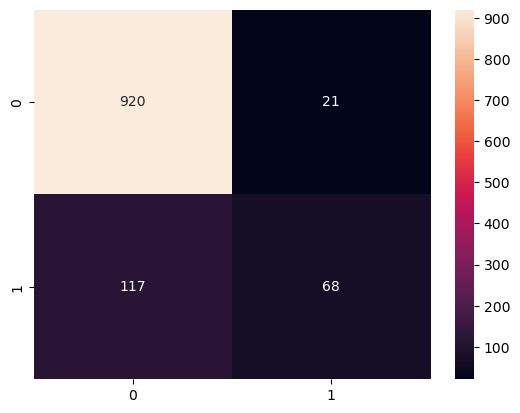

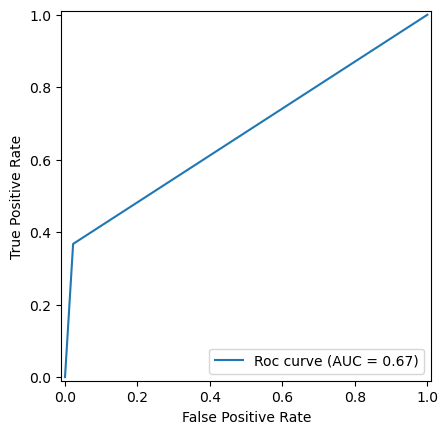

In [69]:
# Modelni yaratish (o'qitish)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Bashorat
y_pred = LR_model.predict(X_test)

# Classification report yordamida modelni baholash
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: \n", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

### Support Vector Machines

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       941
           1       0.74      0.27      0.40       185

    accuracy                           0.86      1126
   macro avg       0.80      0.63      0.66      1126
weighted avg       0.85      0.86      0.84      1126

Model aniqligi:  0.8641207815275311


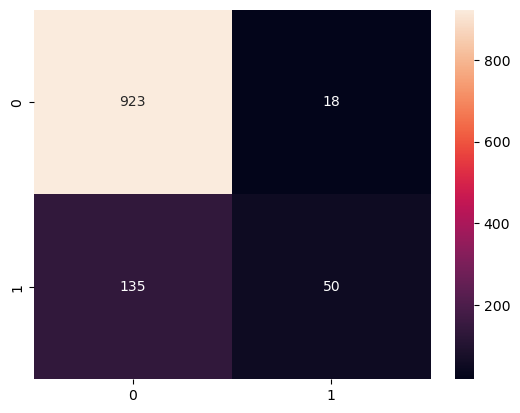

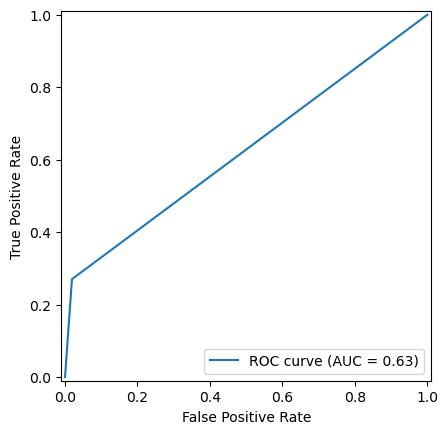

In [70]:
# Modelni yaratish
SVM_model = SVC()
SVM_model.fit(X_train, y_train)

# Bashorat
y_pred = SVM_model.predict(X_test)

# Classification report va accuracy score yordamida baholash
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.88      0.88      0.88       185

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126

Model aniqligi: 0.9591474245115453



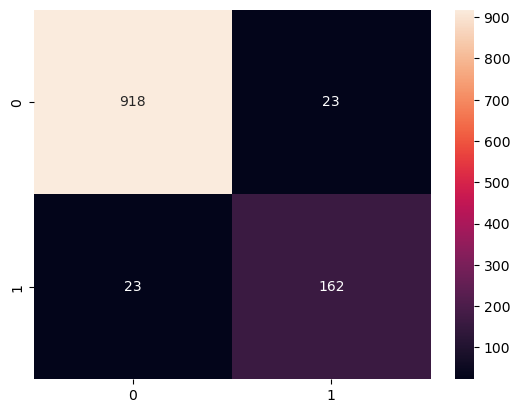

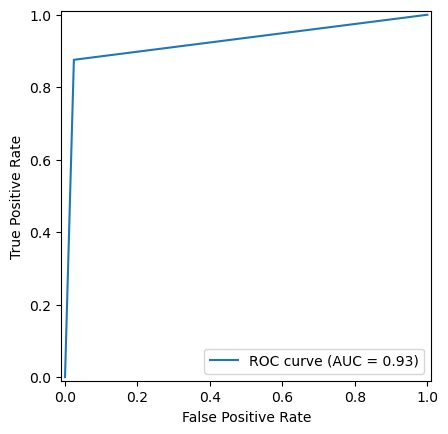

In [71]:
# Modelni yaratish
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Bashorat
y_pred = tree_model.predict(X_test)

# Classification report va accuracy score yordamida modelni baholaymiz
print(metrics.classification_report(y_test, y_pred))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_pred)}\n")

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

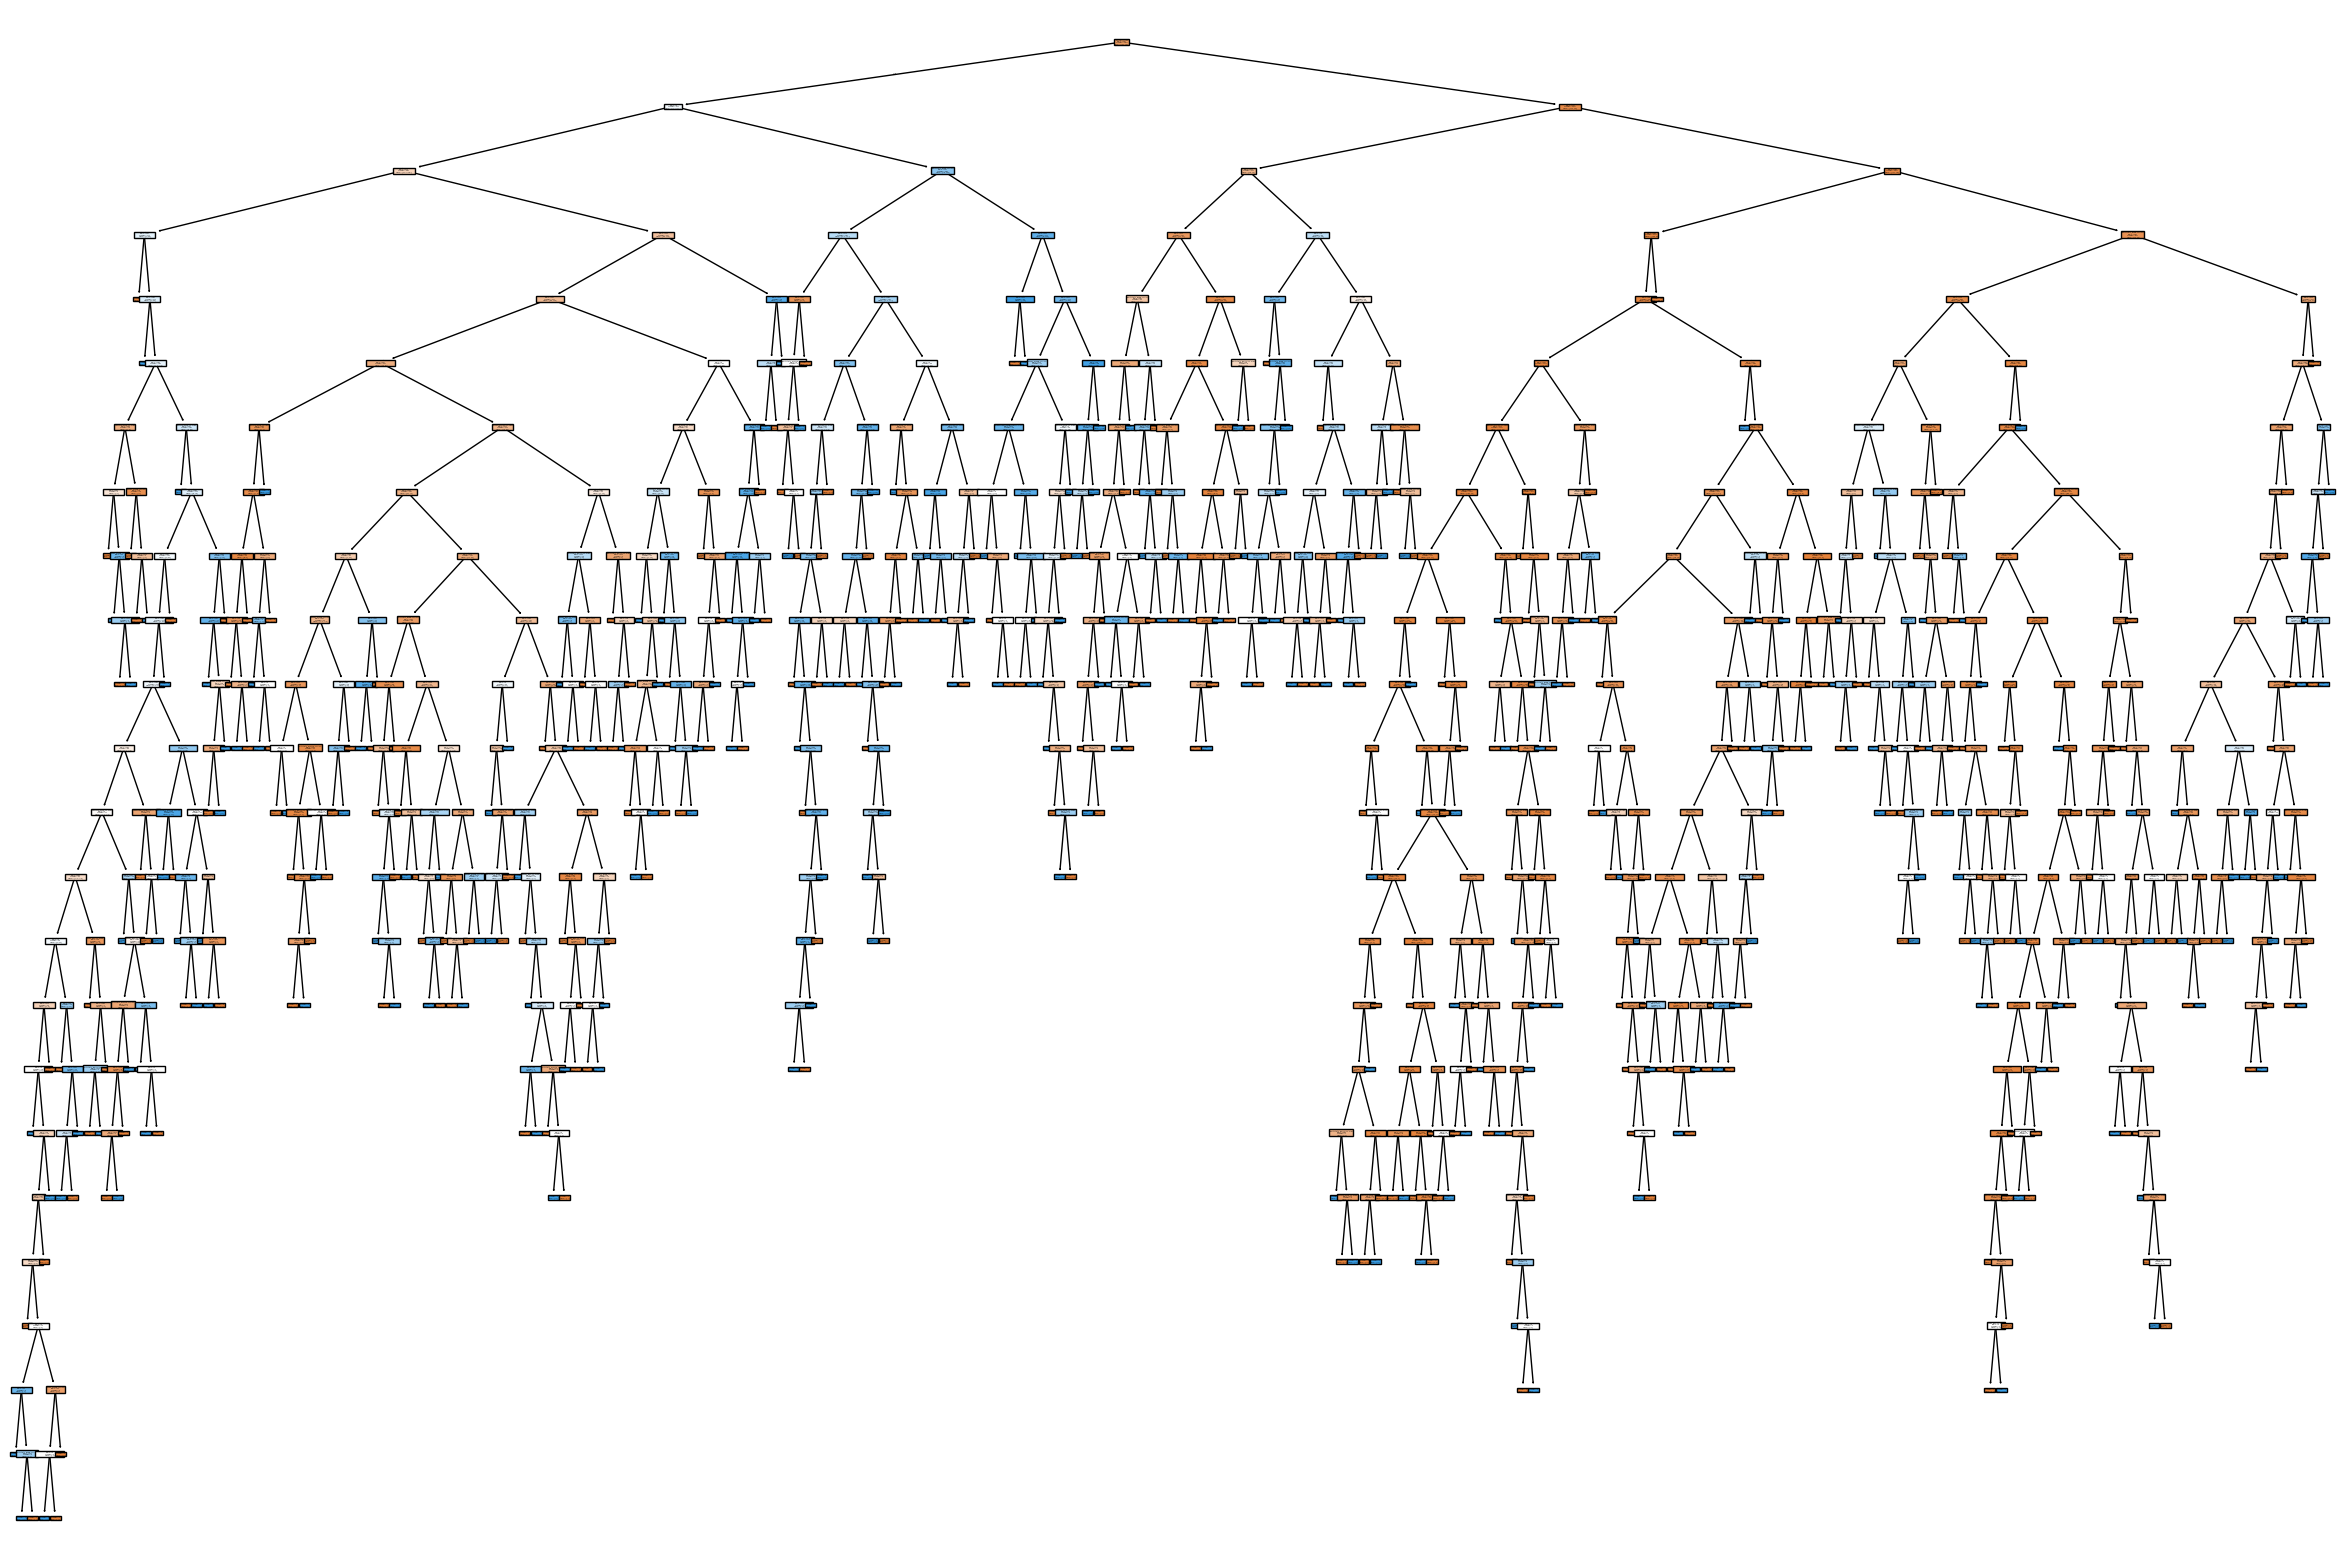

In [72]:
cols = data_fill_encoded.drop("Churn", axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

### DecisionTree modelimizda daraxt shoxlari judayam kopayib ketti shuning uchun `GridSearchCV` yordamida eng yaxshi parametrlarni aniqlaymiz

In [73]:
param_grid = {'max_depth': np.arange(1,60)}
tree_gscv = GridSearchCV(tree_model, param_grid, cv=5)
tree_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [74]:
tree_gscv.best_params_

{'max_depth': np.int64(55)}

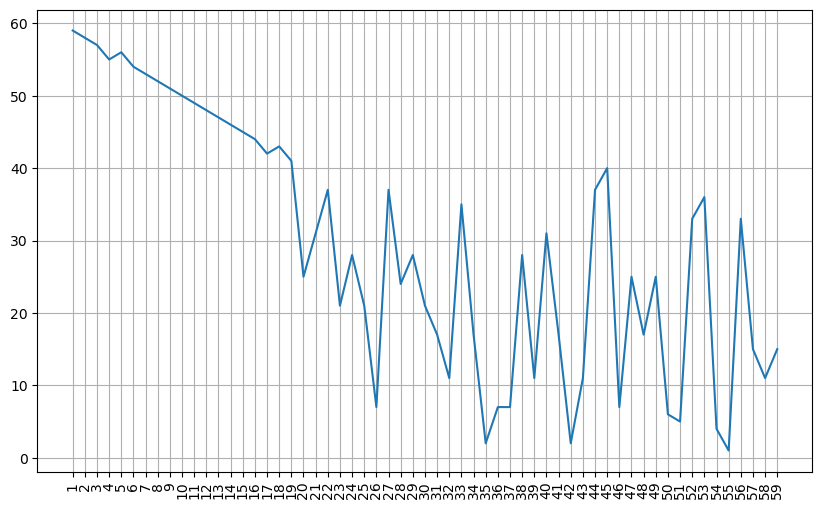

In [75]:
# GridSearchCv natijasini vizual ko'rib olamiz
plt.figure(figsize=(10,6))
plt.plot(param_grid['max_depth'], tree_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['max_depth'], rotation=(90))
plt.grid()
plt.show()

### Decision Tree `max_depth` parametri uchun eng yaxshi qiymatni aniqladik. Endi modelni qaytadan o'qitamiz va natijani chiqaramiz

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       941
           1       0.86      0.85      0.85       185

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Model aniqligi: 0.9520426287744227



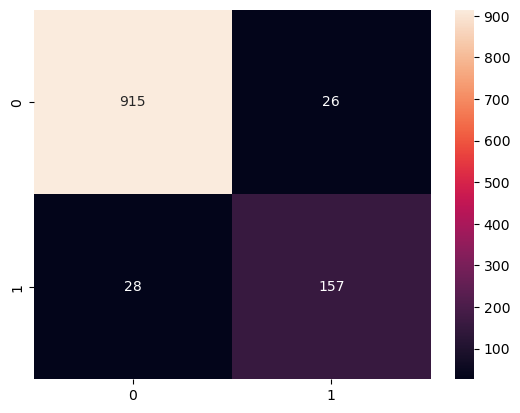

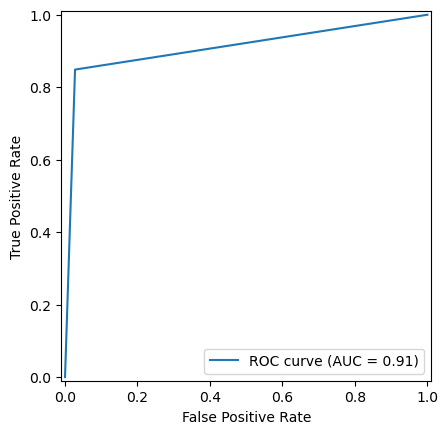

In [76]:
# Modelni yaratish
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Bashorat
y_pred = tree_model.predict(X_test)

# Classification report va accuracy score yordamida modelni baholaymiz
print(metrics.classification_report(y_test, y_pred))
print(f"Model aniqligi: {metrics.accuracy_score(y_test, y_pred)}\n")

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

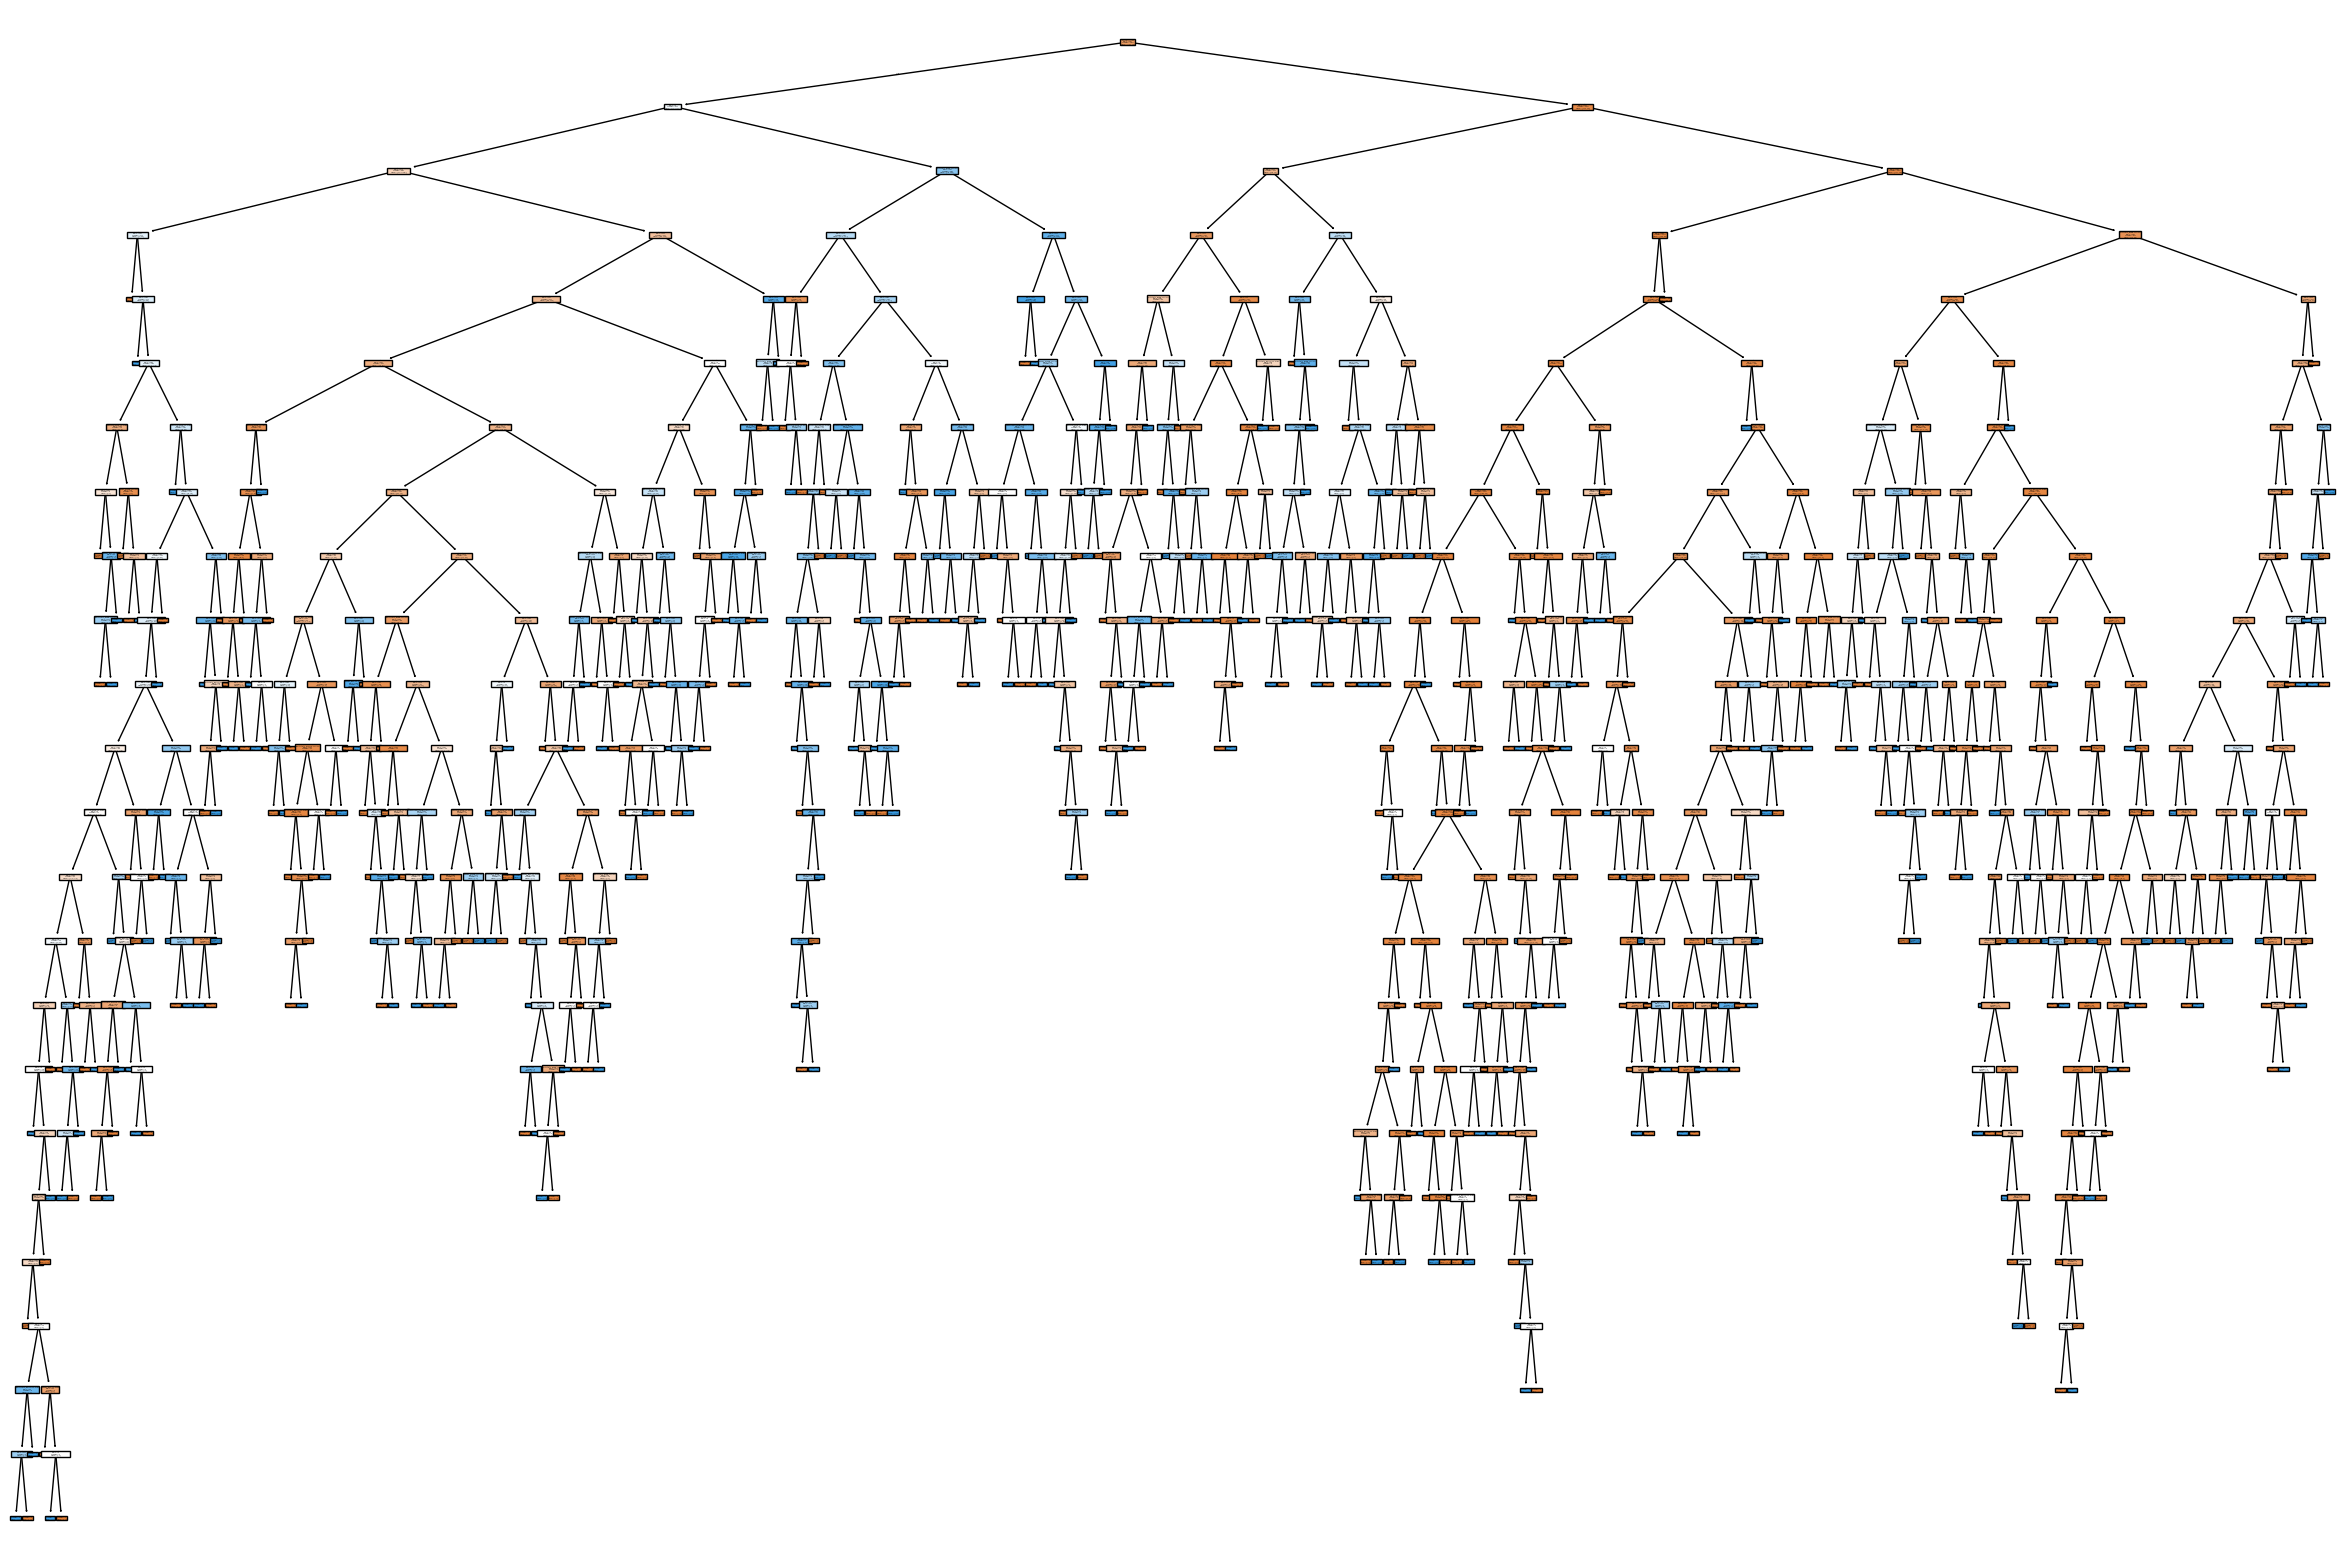

In [77]:
# Tree ni chiqaramiz
cols = data_fill_encoded.drop("Churn", axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Natijada sezilarli o'zgarish yo'q. Demak modelning standart qiymatlari ham yaxshi natija berayapti

## Random Forest

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       941
           1       0.86      0.85      0.85       185

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Accuracy score: 0.9520426287744227



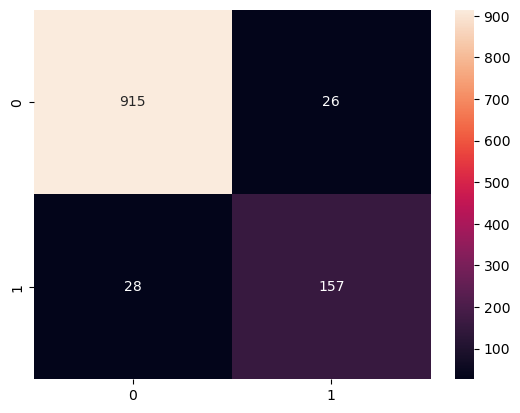

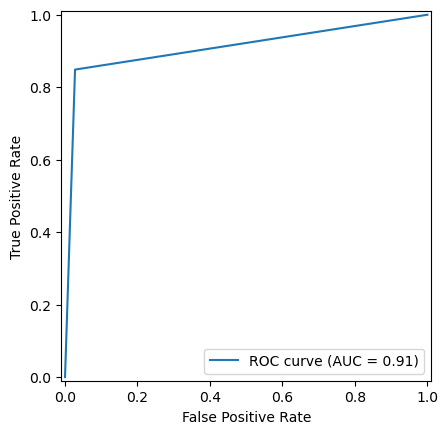

In [78]:
# Modelni yaratish
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Bashorat
RF_model.predict(X_test)

# Classification report va accuracy score orqali modelni baholash
print(metrics.classification_report(y_test, y_pred))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred)}\n")

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [79]:
param_grids = {'n_estimators': np.arange(1,60)}
rf_gscv = GridSearchCV(RF_model, param_grids, cv=5)
rf_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [80]:
rf_gscv.best_params_

{'n_estimators': np.int64(27)}

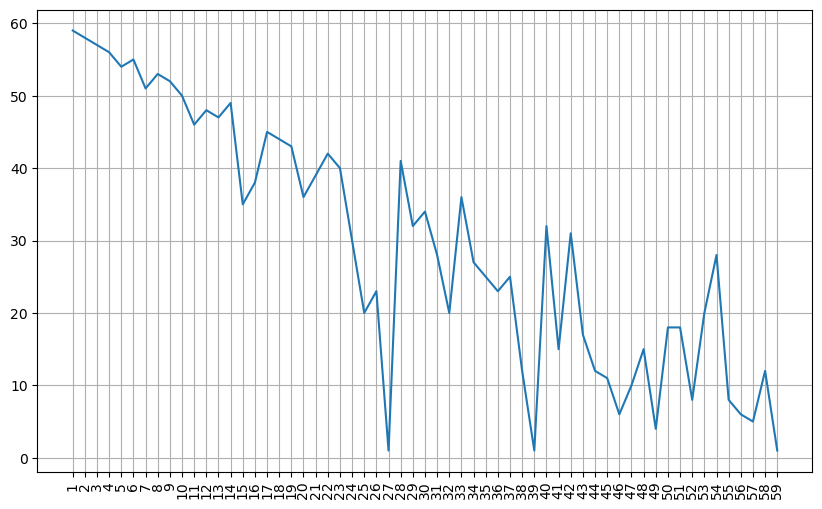

In [81]:
# GridSearchCv natijasini vizual ko'rib olamiz
plt.figure(figsize=(10,6))
plt.plot(param_grids['n_estimators'], rf_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grids['n_estimators'], rotation=(90))
plt.grid()
plt.show()

Random Forest modelini best parameter bilan qayta ishga tushuramiz

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       941
           1       0.86      0.85      0.85       185

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Accuracy score: 0.9520426287744227



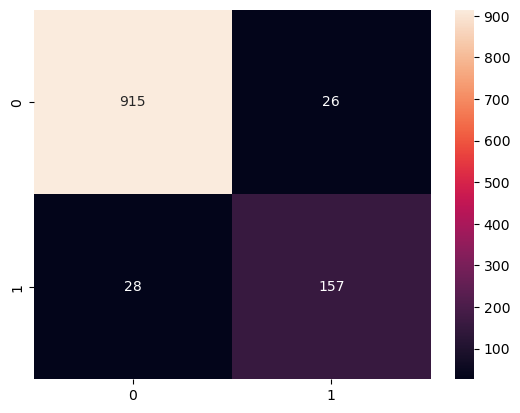

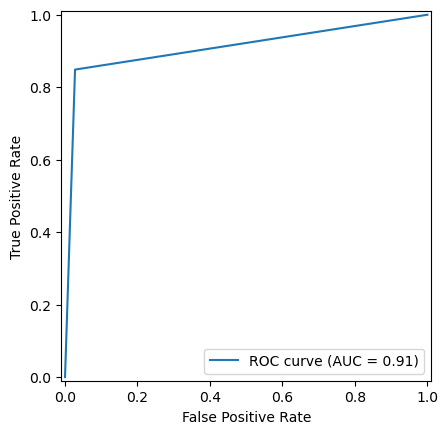

In [82]:
# Modelni yaratish
RF_model = RandomForestClassifier(n_estimators=52)
RF_model.fit(X_train, y_train)

# Bashorat
RF_model.predict(X_test)

# Classification report va accuracy score orqali modelni baholash
print(metrics.classification_report(y_test, y_pred))
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred)}\n")

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# XGBoost

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       941
           1       0.93      0.72      0.81       185

    accuracy                           0.94      1126
   macro avg       0.94      0.85      0.89      1126
weighted avg       0.94      0.94      0.94      1126

Accracy score: 0.9449378330373002



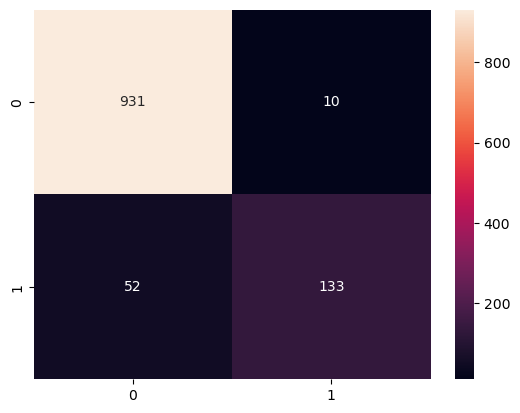

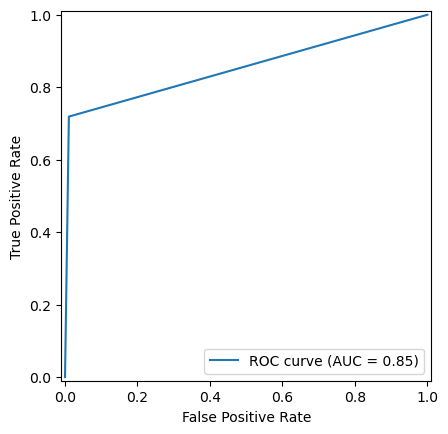

In [83]:
# Modelni yaratish
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Bashorat
y_pred = xgb_model.predict(X_test)

# Classification report va accuracy score yordamida modelni baholash
print(metrics.classification_report(y_test, y_pred))
print(f"Accracy score: {metrics.accuracy_score(y_test, y_pred)}\n")

# confusion_matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()